<a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="background-color:#FFE87C ;font-family:newtimeroman;color:Black;font-size:250%;text-align:center;border-radius:50px 1px;">  Loan Prediction  </p>
 
 <ul style = color:#25383C;font-size:150%;font-family:Serif;>
    <li> Import librarries </li>
    <li> Read dataset</li>
    <li> Data cleaning</li>
    <li> Data visualization</li>
    <li> Import librarries Of Machine Learning</li>
    <li> Data preprocessing</li>
</ul>

In [1]:
# Import Libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read  Data 
df = pd.read_csv('Default_Fin.csv')

In [3]:
df.head()

,Index,Employed,Bank Balance,Annual Salary,Defaulted?
0,1,1,8754.36,532339.56,0
1,2,0,9806.16,145273.56,0
2,3,1,12882.60,381205.68,0
3,4,1,6351.00,428453.88,0
4,5,1,9427.92,461562.00,0


In [4]:
df.sample(5)

,Index,Employed,Bank Balance,Annual Salary,Defaulted?
1191,1192,1,4527.60,507089.88,0
8998,8999,1,6361.08,260841.72,0
5366,5367,0,13259.16,208530.00,0
3209,3210,0,12582.48,124704.72,0
7819,7820,0,4898.64,257192.76,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Index          10000 non-null  int64  
 1   Employed       10000 non-null  int64  
 2   Bank Balance   10000 non-null  float64
 3   Annual Salary  10000 non-null  float64
 4   Defaulted?     10000 non-null  int64  
dtypes: float64(2), int64(3)
memory usage: 390.8 KB


In [6]:
df.columns

Index(['Index', 'Employed', 'Bank Balance', 'Annual Salary', 'Defaulted?'], dtype='object')

In [7]:
df.describe()

,Index,Employed,Bank Balance,Annual Salary,Defaulted?
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,0.705600,10024.498524,402203.782224,0.033300
std,2886.89568,0.455795,5804.579486,160039.674988,0.179428
min,1.00000,0.000000,0.000000,9263.640000,0.000000
25%,2500.75000,0.000000,5780.790000,256085.520000,0.000000
50%,5000.50000,1.000000,9883.620000,414631.740000,0.000000
75%,7500.25000,1.000000,13995.660000,525692.760000,0.000000
max,10000.00000,1.000000,31851.840000,882650.760000,1.000000


# Data Cleaning

In [8]:
df.isnull().sum()

Index            0
Employed         0
Bank Balance     0
Annual Salary    0
Defaulted?       0
dtype: int64

In [9]:
df.duplicated().sum()

0

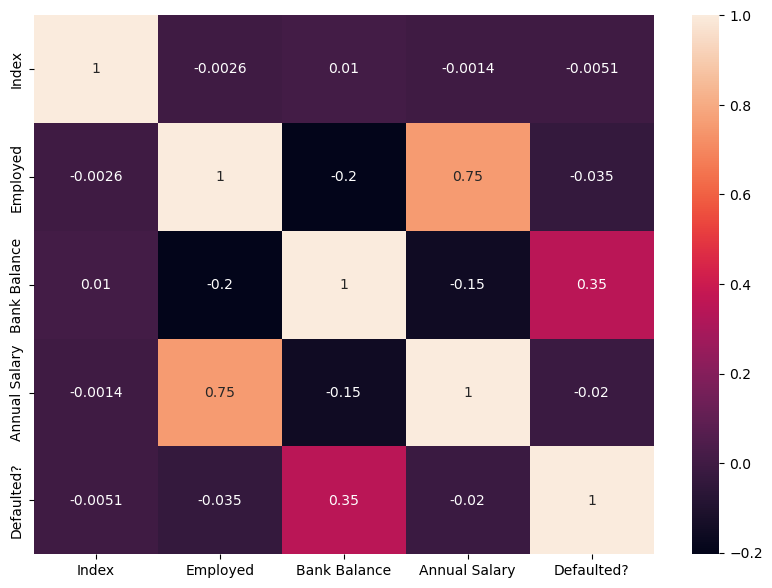

In [10]:
# lets check the Correlation Heat Map of the Data
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [11]:
df.corr()

,Index,Employed,Bank Balance,Annual Salary,Defaulted?
Index,1.000000,-0.002597,0.010342,-0.001427,-0.005135
Employed,-0.002597,1.000000,-0.203578,0.753985,-0.035420
Bank Balance,0.010342,-0.203578,1.000000,-0.152243,0.350119
Annual Salary,-0.001427,0.753985,-0.152243,1.000000,-0.019871
Defaulted?,-0.005135,-0.035420,0.350119,-0.019871,1.000000


In [12]:
df.drop(['Index'],axis=1,inplace=True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Employed       10000 non-null  int64  
 1   Bank Balance   10000 non-null  float64
 2   Annual Salary  10000 non-null  float64
 3   Defaulted?     10000 non-null  int64  
dtypes: float64(2), int64(2)
memory usage: 312.6 KB


<AxesSubplot:xlabel='Defaulted?', ylabel='count'>

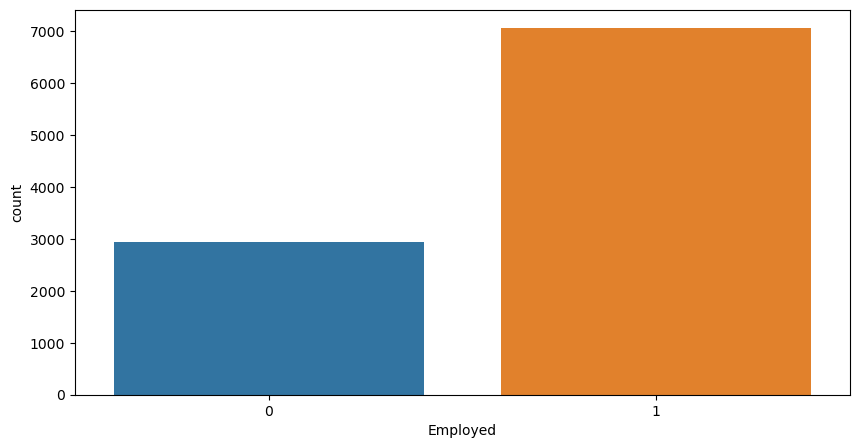

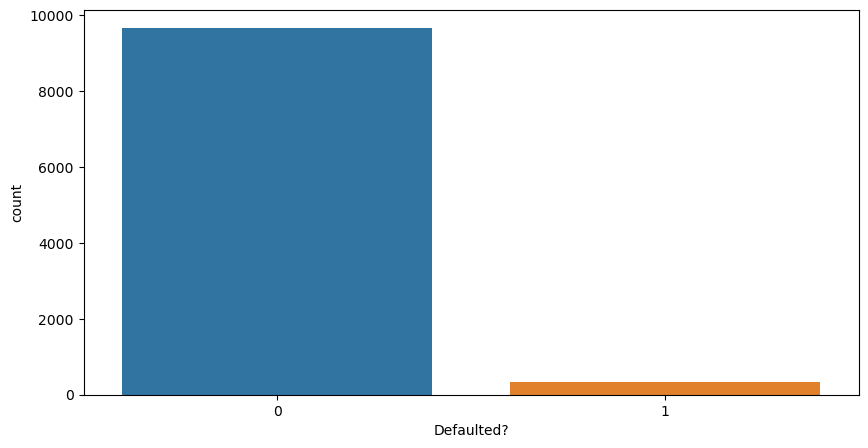

In [14]:
plt.figure(figsize=(10,5))
sns.countplot('Employed',data=df)
plt.figure(figsize=(10,5))
sns.countplot('Defaulted?',data=df)

<AxesSubplot:title={'center':'correlated with defaulted'}>

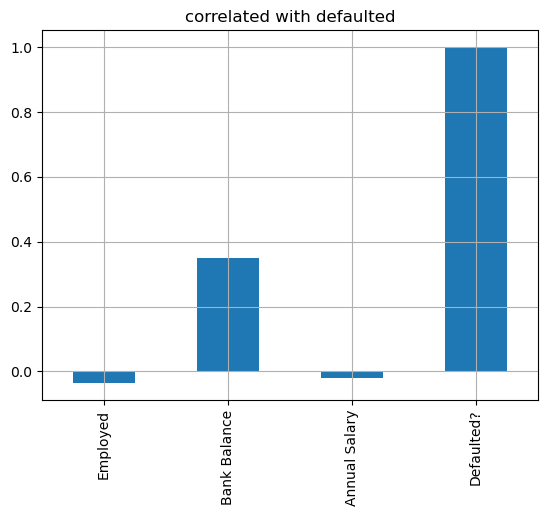

In [15]:
df.corrwith(df['Defaulted?']).plot.bar(title='correlated with defaulted', grid=True)

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [17]:
x = df.drop('Defaulted?',axis = 1)
y = df[['Defaulted?']]

In [18]:
# train test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=1/4, random_state=0)

In [19]:
x_train

,Employed,Bank Balance,Annual Salary
2967,1,12107.40,374829.36
700,1,12729.72,470088.72
3481,0,23659.92,264483.12
1621,1,1378.56,328385.04
800,1,0.00,372998.64
...,...,...,...
9225,1,9775.92,510241.08
4859,1,12538.32,500714.76
3264,0,8244.72,168713.52
9845,0,552.12,167401.08


In [20]:
y_train

,Defaulted?
2967,0
700,0
3481,0
1621,0
800,0
...,...
9225,0
4859,0
3264,0
9845,0


In [21]:
model = LogisticRegression()
model.fit(x_train , y_train)

LogisticRegression()

In [22]:
# predict and accuracy
model.fit(x_train , y_train)
y_pred = model.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [23]:
accuracy_score(y_test,y_pred)

0.9612

In [24]:
# model 
model = DecisionTreeClassifier()

model.fit(x_train , y_train)

DecisionTreeClassifier()

In [25]:
# predict and accuracy
model.fit(x_train , y_train)
y_pred = model.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [26]:
accuracy_score(y_test,y_pred)

0.9544

In [27]:
model = KNeighborsClassifier()
model.fit(x_train , y_train)



KNeighborsClassifier()

In [28]:
# predict and accuracy
model.fit(x_train , y_train)
y_pred = model.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [29]:
accuracy_score(y_test,y_pred)

0.9644